# Bernstein--Vazirani Algorithm

### using string s="1010"  / we can get anyy string


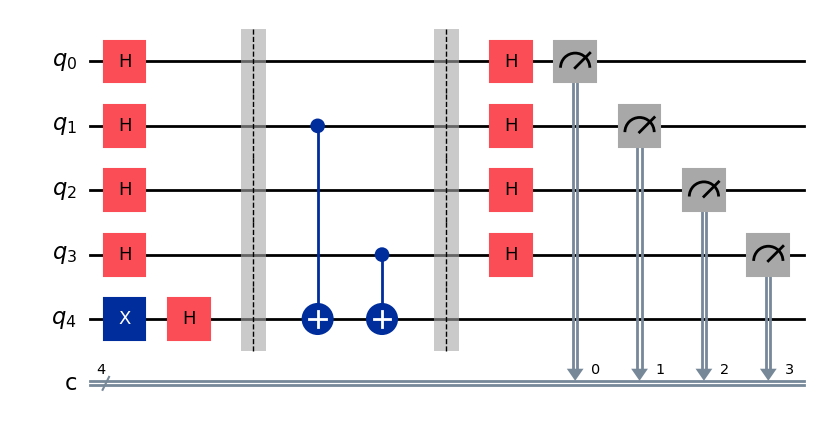

In [30]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

s = '1010'
n = 4

qc = QuantumCircuit(n + 1, n)   # Create quantum circuit with n input qubits + 1 ancilla, and n classical bits

qc.x(n)      # Prepare ancilla
qc.h(n)

for i in range(n):
    qc.h(i)           # Apply Hadamard to all input qubits

qc.barrier()
for i in range(n):    # Oracle 
    bit = s[n-i-1]
    if bit == '1':
        qc.cx(i, n)

qc.barrier()

for i in range(n):   # Apply Hadamard to all input qubits again
    qc.h(i)


qc.measure(range(n), range(n))

qc.draw(output='mpl')


### simulation 

In [31]:

from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("expected string : " , s ,"\n" )
print("Measurement Results:", counts)


expected string :  1010 

Measurement Results: {'1010': 4096}


expected  output 's' with 100% probability 

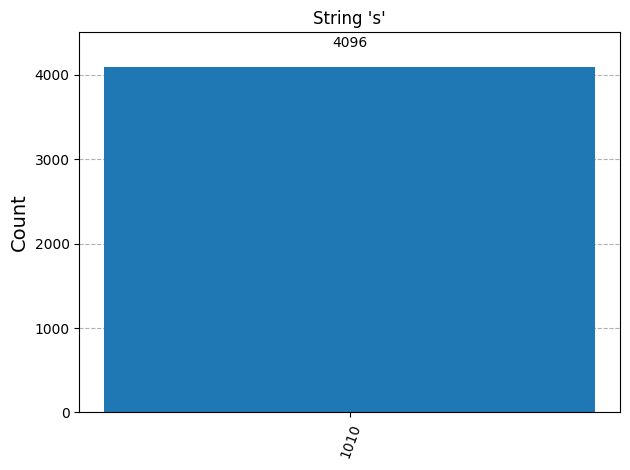

In [32]:
plot_histogram(counts, title="String 's'")